<a href="https://colab.research.google.com/github/SS2803/Object-Detection/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [ ]:
print(y_train[10][0])

4


deer


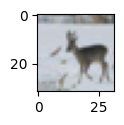

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[20])
print(class_names[y_train[20][0]])
plt.show()

dog


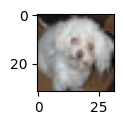

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(x_test[1000])
print(class_names[y_test[1000][0]])
plt.show()

In [ ]:
x_train=x_train/255.0
x_train.shape
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

In [ ]:
print(x_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [ ]:
x_train.ndim

4

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[32,32,3]))

model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))

model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))

model.add(Conv2D(filters=364,kernel_size=3,padding="same",activation="relu"))

model.add(Conv2D(filters=364,kernel_size=3,padding="same",activation="relu"))

model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(units=128,activation='relu'))

model.add(Dense(units=10,activation='softmax'))

model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics="sparse_categorical_accuracy")
model.fit(x_train,y_train,epochs=3)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 364)       105196    
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 364)       1192828   
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 364)         0         
 g2D)                                                 

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 146s 465ms/step - loss: 0.7753 - sparse_categorical_accuracy: 0.7245


[0.7752529978752136, 0.7245000004768372]

In [ ]:
import numpy as np

predictions=model.predict(x_test[0:10]);
predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels)

1/1 [==============================] - 0s 429ms/step
[3 8 8 0 6 6 1 4 3 1]


In [ ]:
predicted_labels[1]

8

In [ ]:
print(y_test[0:10])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [ ]:
for i in range(1,9):
  print(y_test[i]);
  print(predicted_labels[i])

[8]
8
[8]
8
[0]
0
[6]
6
[6]
6
[1]
1
[6]
4
[3]
3


In [ ]:
for i in range(0,9):
  print("Expected: ",class_names[y_test[i][0]])
  print("predicted: ",class_names[predicted_labels[i]])

Expected:  cat
predicted:  cat
Expected:  ship
predicted:  ship
Expected:  ship
predicted:  ship
Expected:  airplane
predicted:  airplane
Expected:  frog
predicted:  frog
Expected:  frog
predicted:  frog
Expected:  automobile
predicted:  automobile
Expected:  frog
predicted:  deer
Expected:  cat
predicted:  cat


In [ ]:
print(y_test[1:10])

[[8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]
